In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from wordcloud import WordCloud
import nltk
from seaborn import color_palette

nltk.download('stopwords')

palette = sns.color_palette(["#2176AB", "#F97662", "#FFBF00", "#50C878", "#B284BE"])
sns.set_palette(palette)

df = pd.read_csv('../../dataset/tables_clean.csv')

df.describe()

[nltk_data] Downloading package stopwords to /home/marco/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,n_columns,n_rows,n_cells,caption_len,n_references,n_footnotes
count,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000
mean,4.601684,12.843264,68.614637,136.539508,10.766839,0.518135
std,3.565155,20.679263,160.754579,172.775921,12.442481,9.815851
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,3.000000,4.000000,15.000000,48.000000,3.000000,0.000000
50%,4.000000,8.000000,28.000000,77.000000,8.000000,0.000000
75%,6.000000,14.000000,56.250000,168.000000,14.000000,0.000000
max,80.000000,433.000000,3031.000000,2983.000000,117.000000,369.000000


In [43]:
# TF-IDF Analysis of the dataset

# Create a vectorizer
vectorizer = CountVectorizer()

# Fit the vectorizer
X = vectorizer.fit_transform(df['caption'].fillna(''))

# Create a transformer
transformer = TfidfTransformer()

# Fit the transformer
tfidf = transformer.fit_transform(X)

# Get the feature names
feature_names = vectorizer.get_feature_names_out()

# Create a dataframe
df_tfidf = pd.DataFrame(tfidf.toarray(), columns=feature_names)

# Get the top 10 words
top_words = df_tfidf.sum().sort_values(ascending=False).head(300)

# filter out common words and numbers
stop_words = set(stopwords.words('english'))
top_words = top_words[~top_words.index.isin(stop_words)]
top_words = top_words[~top_words.index.str.isnumeric()]

#dark grey


# Plot the wordcloud of the top 10 words
wordcloud = (WordCloud(width=1100, height=600, background_color='#222222', colormap='Spectral_r')
             .generate_from_frequencies(top_words))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('output/wordcloud.png', dpi=500)


TypeError: '_ColorPalette' object is not callable

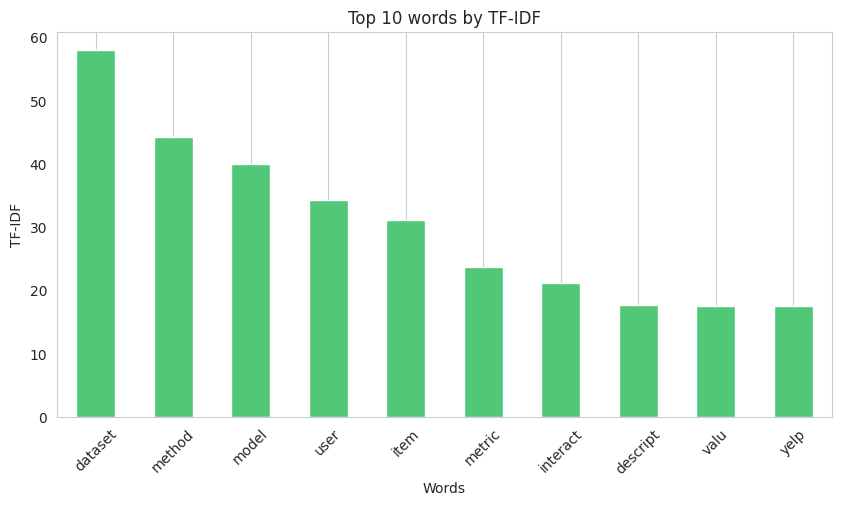

In [35]:

# TF-IDF Analysis of the dataset
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from wordcloud import WordCloud

# Create a vectorizer
vectorizer = CountVectorizer()

# Fit the vectorizer
X = vectorizer.fit_transform(df['columns'].fillna(''))

# Create a transformer
transformer = TfidfTransformer()

# Fit the transformer
tfidf = transformer.fit_transform(X)

# Get the feature names
feature_names = vectorizer.get_feature_names_out()

# Create a dataframe
df_tfidf = pd.DataFrame(tfidf.toarray(), columns=feature_names)
top_words = df_tfidf.sum().sort_values(ascending=False).head(10)

# filter out common words and numbers
stop_words = set(stopwords.words('english'))
top_words = top_words[~top_words.index.isin(stop_words)]
top_words = top_words[~top_words.index.str.isnumeric()]

# bar plot of the top 10 words
plt.figure(figsize=(10, 5))
top_words.plot(kind='bar', color=palette[3])
plt.xlabel('Words')
plt.ylabel('TF-IDF')
plt.title('Top 10 words by TF-IDF')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.savefig('output/top_words.png', dpi=300)

